In [1]:
# Import modules

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.metrics import mean_squared_error, classification_report

In [3]:
df = pd.read_csv("cancer_classification.csv")

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

<Axes: xlabel='mean radius', ylabel='mean perimeter'>

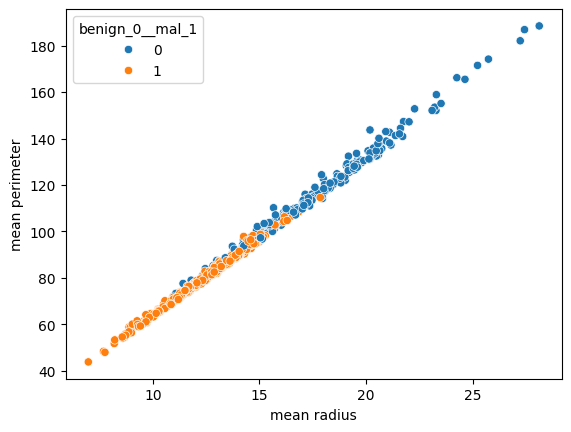

In [8]:
sns.scatterplot(x='mean radius', y='mean perimeter', data=df, hue='benign_0__mal_1')

<Axes: >

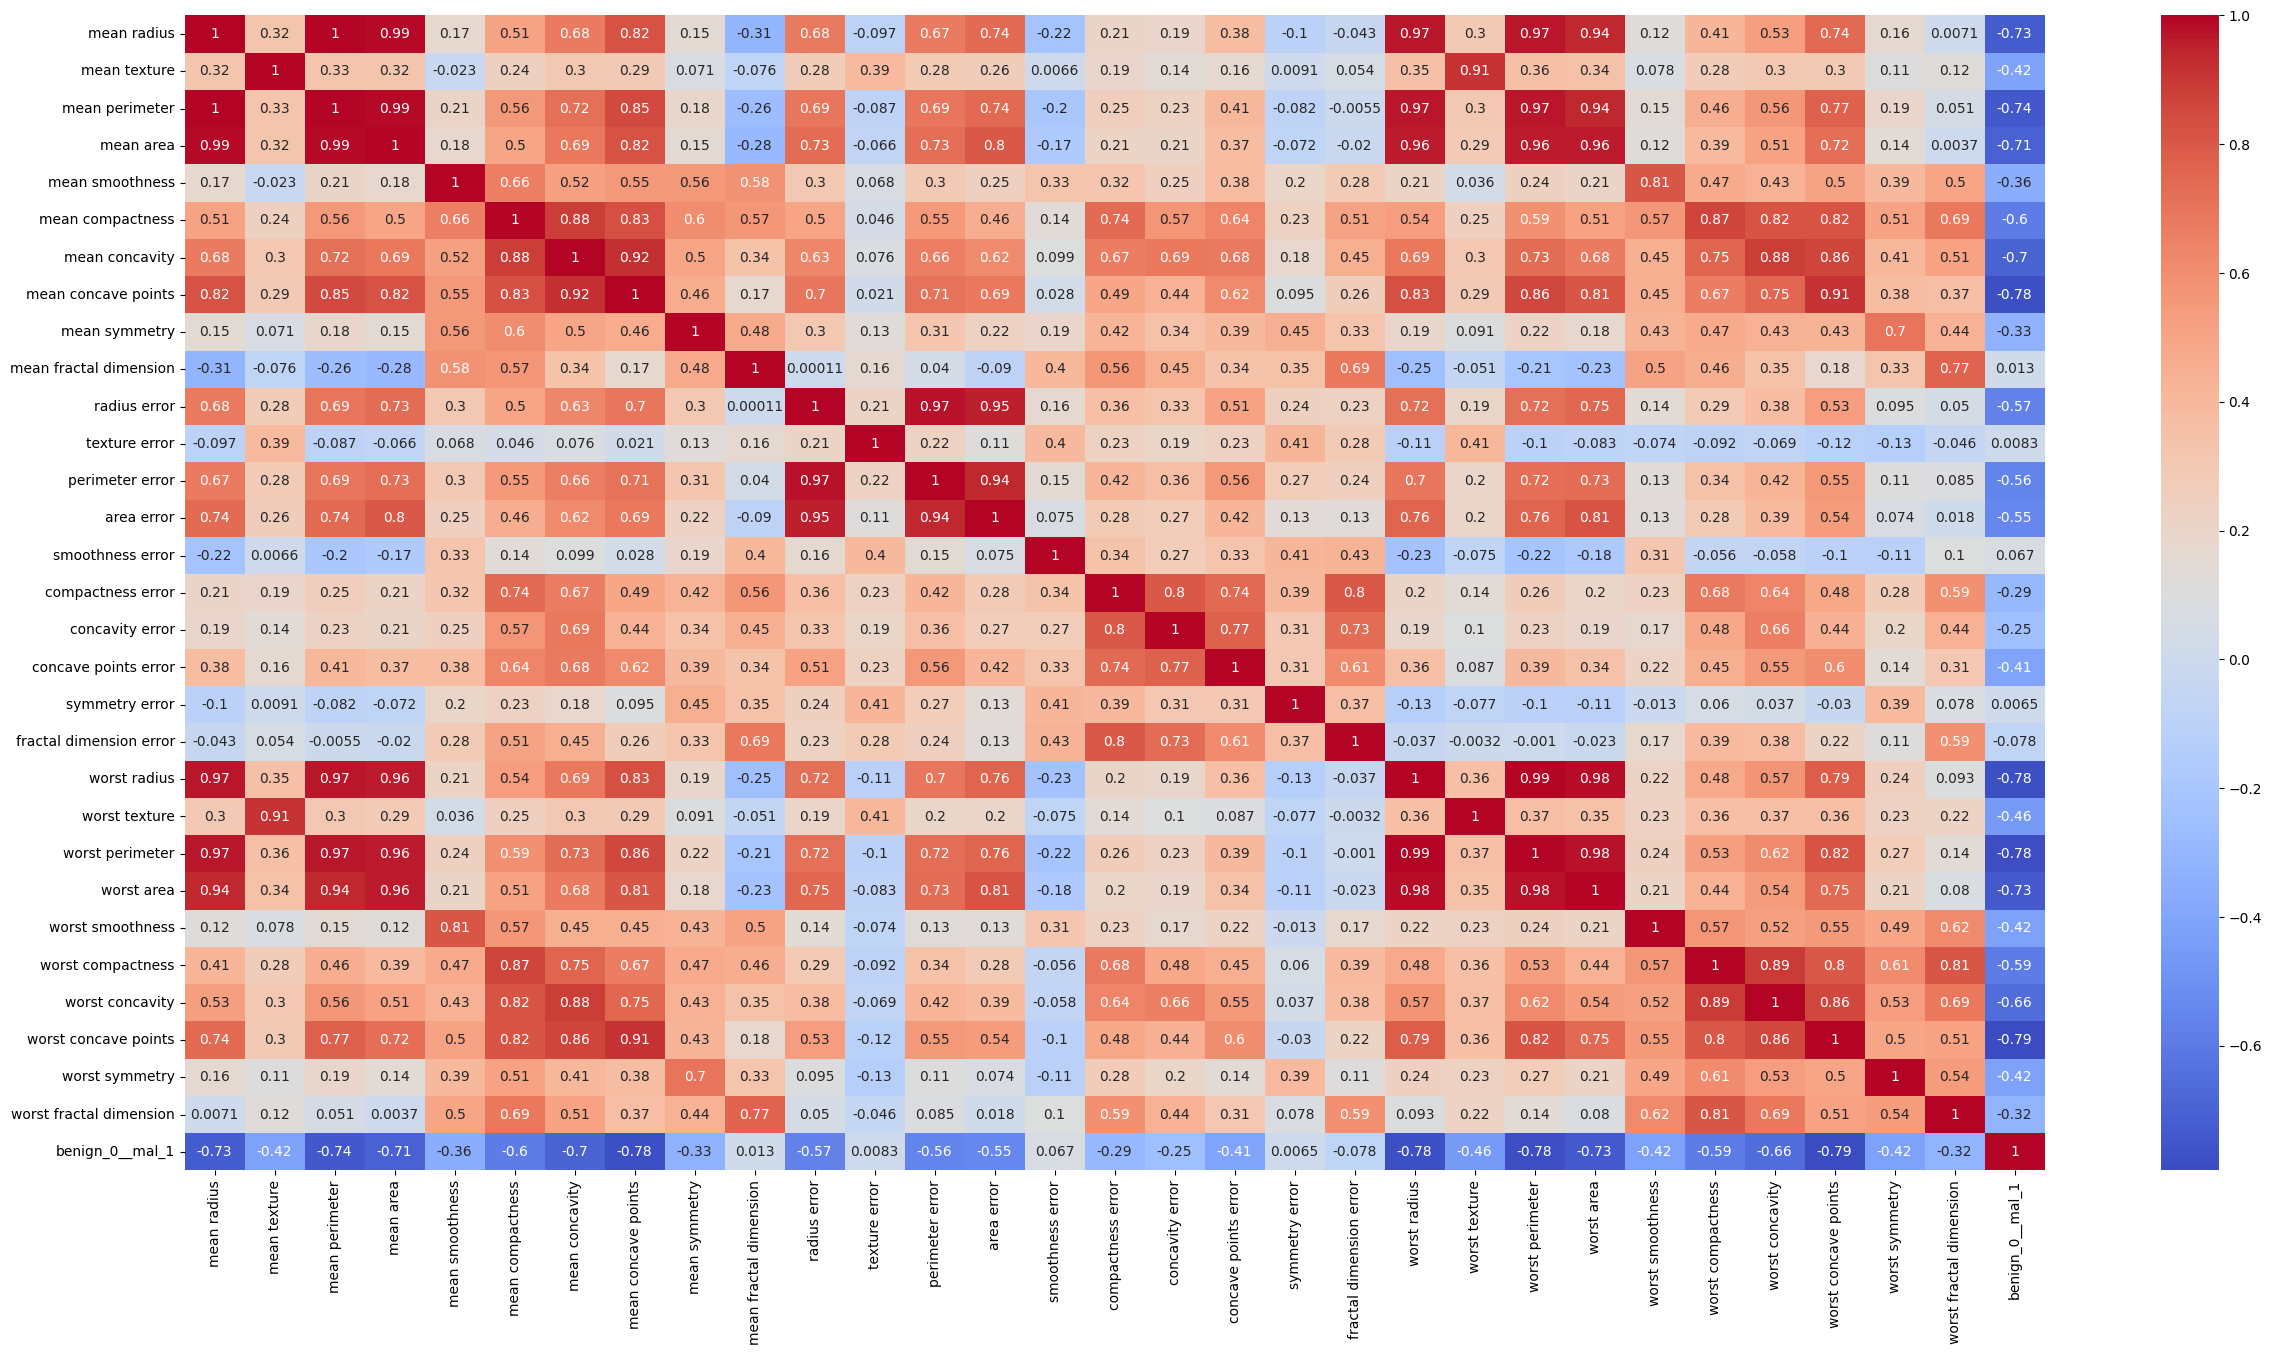

In [10]:
plt.figure(figsize=(30, 15))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [11]:
# Drop columns with low correlation with bening_0_mal_1

df.drop(['mean fractal dimension', 'texture error', 'symmetry error'], axis=1, inplace=True)

In [12]:
# Data Splitting

X = df.drop('benign_0__mal_1', axis=1)
y = df['benign_0__mal_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

In [21]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,radius error,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,1.0950,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.5435,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.7456,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.4956,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.7572,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
# Data Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_train

array([[-0.1068795 ,  1.05502065, -0.14143064, ..., -0.82764577,
        -0.36402055, -1.12771662],
       [-0.38910257, -1.38122652, -0.39977684, ..., -0.47510921,
        -0.51954696, -0.08479479],
       [-0.58865424, -0.08579894, -0.63249511, ..., -0.98257833,
        -0.02311921, -0.17656327],
       ...,
       [-0.74829558, -0.19121348, -0.77220873, ..., -0.76065618,
        -0.24305556, -1.03810739],
       [-1.49290838, -1.08372326, -1.37115858, ..., -1.02953222,
        -1.00654887,  1.31170561],
       [-0.04131252,  0.08286432, -0.03478532, ...,  1.03276846,
         0.44660198,  1.15515937]])

In [16]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

preds = logreg.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        44
           1       0.97      0.99      0.98        70

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [17]:
# Decision Tree Classifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

preds = dtc.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        44
           1       0.97      0.90      0.93        70

    accuracy                           0.92       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114



In [18]:
# Random Forest Classifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

preds = rfc.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        44
           1       0.97      0.91      0.94        70

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [22]:
# Convert X_train and X_test to pandas DataFrame

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [24]:
# Support Vector Classifier

svc = SVC()
svc.fit(X_train, y_train)

preds = svc.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.97      0.97      0.97        70

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [27]:
df = pd.read_csv("auto_insurance_sweden.csv")

In [28]:
df.head()

,x,y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [29]:
# Check for missing values

df.isnull().sum()

x    0
y    0
dtype: int64

<Axes: xlabel='x', ylabel='y'>

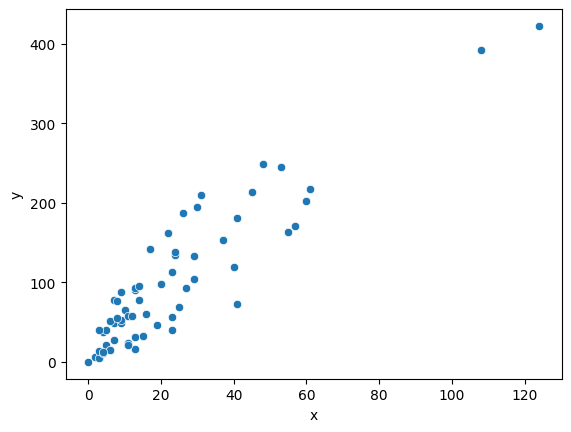

In [30]:
sns.scatterplot(x='x', y='y', data=df)

In [31]:
df.shape

(63, 2)

In [34]:
# Data Splitting

X = df[['x']]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [35]:
# Data Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
# Linear Regression

linreg = LinearRegression()
linreg.fit(X_train, y_train)
preds = linreg.predict(X_test)

print(mean_squared_error(y_test, preds))

854.2055911731438


In [38]:
# Decision Tree Regression

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
preds = dtr.predict(X_test)

print(mean_squared_error(y_test, preds))

2736.4957692307694


In [39]:
# Random Forest Regressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
preds = rfr.predict(X_test)

print(mean_squared_error(y_test, preds))

1796.6793950627502


In [40]:
# Support Vector Regressor

svr = SVR()
svr.fit(X_train, y_train)
preds = svr.predict(X_test)

print(mean_squared_error(y_test, preds))

5476.653788546406


In [44]:
# Hyperparameter tuning for Linear Regression

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
    'n_jobs': [1, 2, 3, 4],
    'fit_intercept': [True, False], 
    'copy_X': [True, False],
    'positive': [True, False]
}

model = LinearRegression()

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [1, 2, 3, 4],
                         'positive': [True, False]})

In [45]:
grid_search.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': True}

In [46]:
grid_search.best_estimator_

LinearRegression(n_jobs=1, positive=True)

In [48]:
# Linear Regression

linreg = LinearRegression(n_jobs=1, positive=True, copy_X=True, fit_intercept=True)
linreg.fit(X_train, y_train)
preds = linreg.predict(X_test)

print(mean_squared_error(y_test, preds))

854.2055911731438


In [50]:
# Hyperparameter tuning for Decision Tree Regressor

param_grid = {
    'max_depth': [1, 10, 100],
    'min_samples_leaf': [1, 2, 5, 10],
    'min_samples_split': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"] 
}

model = DecisionTreeRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

/Users/ifeoluwaoduwaiye/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
720 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ifeoluwaoduwaiye/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ifeoluwaoduwaiye/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/ifeoluwaoduwaiye/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/base.py

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 10, 100],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [1, 2, 5, 10]})

In [52]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_split=10)

In [53]:
# Decision Tree Regression

dtr = DecisionTreeRegressor(max_depth=10, min_samples_split=10)
dtr.fit(X_train, y_train)
preds = dtr.predict(X_test)

print(mean_squared_error(y_test, preds))

2399.998582633438


The hyperparameter tuning of the Random Forest Regressor took 74 minutes to run on my system.

In [59]:
# Hyperparameter tuninf of random forest regressor

param_grid = {
    'max_depth': [1, 10, 100],
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [1, 5, 10],
    'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.01, 0.001],
    'n_estimators': [1, 10, 100, 1000]
}

model = RandomForestRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

/Users/ifeoluwaoduwaiye/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
2880 fits failed out of a total of 8640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2880 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ifeoluwaoduwaiye/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ifeoluwaoduwaiye/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/ifeoluwaoduwaiye/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/base.

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 10, 100],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [1, 5, 10],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.01, 0.001],
                         'n_estimators': [1, 10, 100, 1000]})

In [60]:
grid_search.best_estimator_

RandomForestRegressor(criterion='poisson', max_depth=10, min_samples_split=5,
                      min_weight_fraction_leaf=0.01, n_estimators=10)

In [61]:
rfr = RandomForestRegressor(criterion='poisson', max_depth=10, min_samples_split=5,
                      min_weight_fraction_leaf=0.01, n_estimators=10)

rfr.fit(X_train, y_train)
preds = rfr.predict(X_test)

print(mean_squared_error(y_test, preds))

1375.679129190968


In [56]:
# Hyperparameter tuning of SVR

param_grid = {
  #  'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'degree': [1, 2, 3, 4],
    'gamma': ['scale', 'auto'],
    'C': [1.0, 0.1, 0.01, 0.001]
}

model = SVR()

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1.0, 0.1, 0.01, 0.001], 'degree': [1, 2, 3, 4],
                         'gamma': ['scale', 'auto']})

In [57]:
grid_search.best_estimator_

SVR(degree=1, gamma='auto')

In [58]:
# Support Vector Regressor

svr = SVR(degree=1, gamma='auto')
svr.fit(X_train, y_train)
preds = svr.predict(X_test)

print(mean_squared_error(y_test, preds))

5476.653788546406
